<a href="https://colab.research.google.com/github/siddharth0517/Social-Media-User-Segmentation/blob/main/Social_Media_User_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Media User Segmentation project using hierarchical clustering.

**1. Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Importing Dataset**

In [2]:
Dataset = pd.read_csv('data.csv')

In [4]:
X = Dataset[['Total Time Spent', 'Number of Sessions', 'Engagement', 'ProductivityLoss',
                 'Satisfaction', 'Addiction Level', 'Self Control']]

In [5]:
print(X)

     Total Time Spent  Number of Sessions  Engagement  ProductivityLoss  \
0                  80                  17        7867                 3   
1                 228                  14        5944                 5   
2                  30                   6        8674                 6   
3                 101                  19        2477                 3   
4                 136                   6        3093                 8   
..                ...                 ...         ...               ...   
995               144                   7        5179                 9   
996               231                  15        1803                 8   
997               165                   1        9290                 9   
998               151                  11        2050                 3   
999               167                  17        9790                 6   

     Satisfaction  Addiction Level  Self Control  
0               7                5             5

**3. Feature Scaling**

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

**4. Selecting optimal number of Clusters**

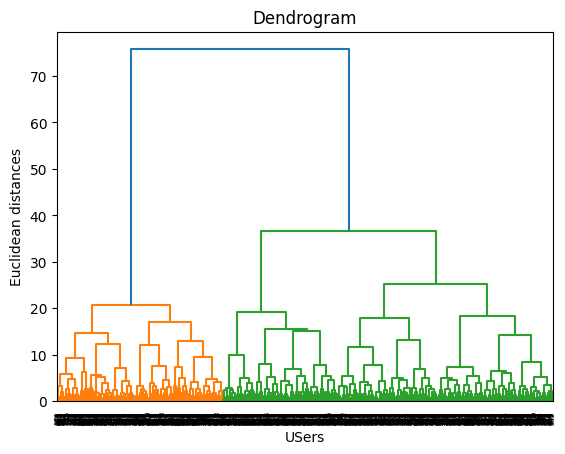

In [7]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('USers')
plt.ylabel('Euclidean distances')
plt.show()

**5. Model Buidling**

In [8]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

**6. Assigning Cluster to User**

In [11]:
Dataset['Cluster'] = y_hc
Dataset.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType,Cluster
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data,0
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi,1
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data,3
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data,0
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data,2


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


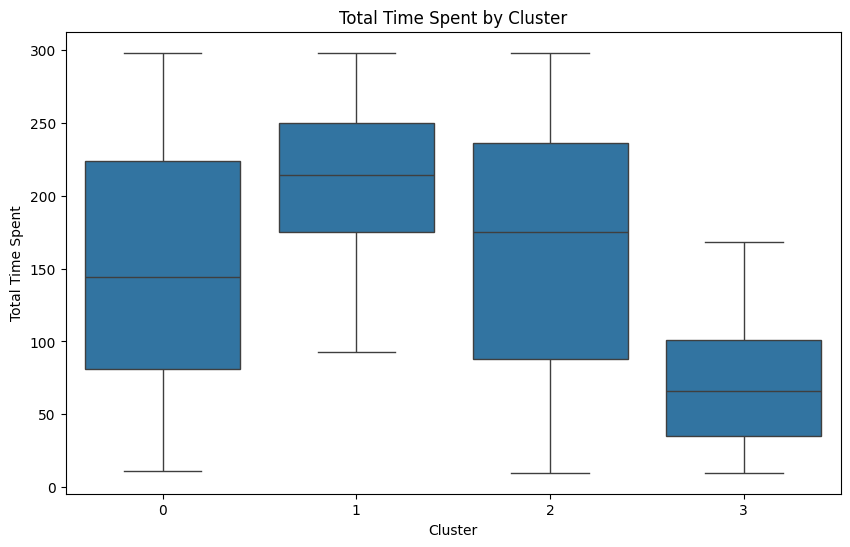

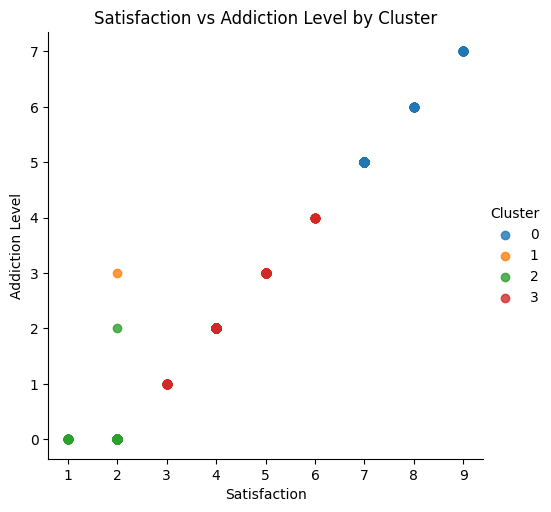

In [14]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Total Time Spent', data=Dataset)
plt.title('Total Time Spent by Cluster')
plt.show()

sns.lmplot(x='Satisfaction', y='Addiction Level', hue='Cluster', data=Dataset, fit_reg=False)
plt.title('Satisfaction vs Addiction Level by Cluster')
plt.show()

In [15]:
from sklearn.metrics import silhouette_score


silhouette_avg = silhouette_score(X, y_hc)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.21444823583479225
